In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import sweetviz as sv
import pygwalker as pw
from gc import collect
from tqdm import tqdm
from pathlib import Path

import warnings; warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
root = Path.cwd().parent
data = root / 'data'

In [3]:
df = pd.read_csv(data / 'train_val.csv')

In [4]:
df.head()

,name,family,phylum,order,genus,class,file_name,height,width,location_uncertainty,date,latitude,longitude,set,specific_epithet,image_dir_name,dataset,common_name,file_path,gcs_path,month,class_id,year,days,norm_date
0,Herpothallon rubrocinctum,Arthoniaceae,Ascomycota,Arthoniales,Herpothallon,Arthoniomycetes,cbb41cb8edf3cfe364e4e3b083ab7a24.jpg,600,800,0.0,2016-08-02 00:00:00+00:00,28.367144,-81.437020,train,rubrocinctum,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,2018,NaN,Mushroom-Classifier/data/train/Fungi_Ascomycot...,gs://mush-img-repo/train/ Fungi_Ascomycota_Art...,8,185,2016,215,0.586301
1,Herpothallon rubrocinctum,Arthoniaceae,Ascomycota,Arthoniales,Herpothallon,Arthoniomycetes,755adc87e72ccb246b5b177efb0b8715.jpg,600,800,29.0,2015-10-24 00:00:00+00:00,28.367783,-81.436785,train,rubrocinctum,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,2018,NaN,Mushroom-Classifier/data/train/Fungi_Ascomycot...,gs://mush-img-repo/train/ Fungi_Ascomycota_Art...,10,185,2015,297,0.810959
2,Herpothallon rubrocinctum,Arthoniaceae,Ascomycota,Arthoniales,Herpothallon,Arthoniomycetes,0be8000dcc267e8538152788dd4a05fe.jpg,600,800,0.0,2016-12-22 00:00:00+00:00,28.300703,-81.453300,train,rubrocinctum,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,2018,NaN,Mushroom-Classifier/data/train/Fungi_Ascomycot...,gs://mush-img-repo/train/ Fungi_Ascomycota_Art...,12,185,2016,357,0.975342
3,Herpothallon rubrocinctum,Arthoniaceae,Ascomycota,Arthoniales,Herpothallon,Arthoniomycetes,e3199adcb85cdf4b66e0066a6957788a.jpg,600,800,0.0,2016-12-22 00:00:00+00:00,28.300703,-81.453300,train,rubrocinctum,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,2018,NaN,Mushroom-Classifier/data/train/Fungi_Ascomycot...,gs://mush-img-repo/train/ Fungi_Ascomycota_Art...,12,185,2016,357,0.975342
4,Herpothallon rubrocinctum,Arthoniaceae,Ascomycota,Arthoniales,Herpothallon,Arthoniomycetes,7fc01fe5971cc9d8a5e0ccd49fad91af.jpg,600,800,0.0,2016-07-20 00:00:00+00:00,28.360108,-81.210864,train,rubrocinctum,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,2018,NaN,Mushroom-Classifier/data/train/Fungi_Ascomycot...,gs://mush-img-repo/train/ Fungi_Ascomycota_Art...,7,185,2016,202,0.550685


In [7]:
df = df[['name', 'height', 'width', 'location_uncertainty', 'date', 'latitude', 'longitude', 'set', 'dataset', 'class_id']]
sv.analyze(df).show_html('eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
#print(df[df['set'] == 'train']['class_id'].value_counts())
print(df[df['set'] == 'validation']['class_id'].value_counts())

class_id
185    23
242    23
409    23
342    23
343    23
       ..
149     3
335     3
353     3
312     3
444     3
Name: count, Length: 467, dtype: int64


<Axes: ylabel='count'>

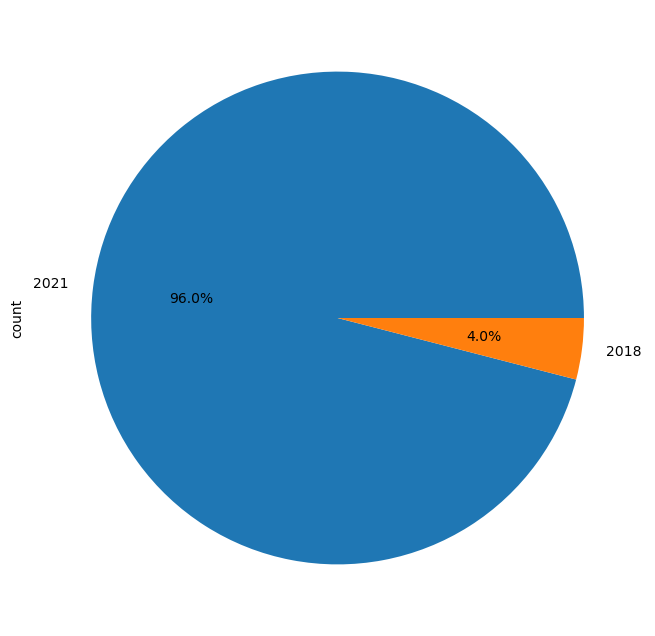

In [11]:
df['dataset'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))